In [29]:
# We import all required libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import numpy as np
import matplotlib

sys.path.append('../py_files') # <- py_files relative path
import functions

In [30]:
# Also, we read all required csv files:
fifa_17 = pd.read_csv("../csv_files/fifa17.csv", index_col=0)
fifa_18 = pd.read_csv("../csv_files/fifa18.csv", index_col=0)
fifa_19 = pd.read_csv("../csv_files/fifa19.csv", index_col=0)
fifa_21 = pd.read_csv("../csv_files/fifa21.csv", index_col=0)
fifa_22 = pd.read_csv("../csv_files/fifa22.csv", index_col=0)
fifa_gk = pd.read_csv("../csv_files/fifagk.csv", index_col=0)


In [37]:
# And we sort our dataframes by points obtained in Ballon d'Or ceremonies:
fifa_17 = fifa_17.sort_values(by=['points'], ascending = False)
fifa_18 = fifa_18.sort_values(by=['points'], ascending = False)
fifa_19 = fifa_19.sort_values(by=['points'], ascending = False)
fifa_21 = fifa_21.sort_values(by=['points'], ascending = False)
fifa_22 = fifa_22.sort_values(by=['points'], ascending = False)
last_5_years = pd.concat([fifa_17, fifa_18, fifa_19, fifa_21, fifa_22], ignore_index=True, sort=False)
last_5_years_with_gk = pd.concat([last_5_years, fifa_gk], ignore_index=True, sort=False)
# fifagk -> sorted by year edition

In [48]:
players_points_corr = pd.DataFrame(fifa_17.corr()['points'])
players_points_corr

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_3363/1624909132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  players_points_corr = pd.DataFrame(fifa_17.corr()['points'])


,points
player_id,-0.832026
fifa_version,NaN
overall,0.597137
value_eur,0.667768
wage_eur,0.860457
age,0.470158
height_cm,-0.049422
weight_kg,0.479057
club_jersey_number,-0.268392
release_clause_eur,NaN


In [51]:
gk_poins_corr = pd.DataFrame(fifa_gk.corr()['points'])
gk_poins_corr

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_3363/1106179200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gk_poins_corr = pd.DataFrame(fifa_gk.corr()['points'])


,points
player_id,-0.995152
fifa_version,-0.786166
overall,0.553525
value_eur,-0.805623
wage_eur,0.156252
age,0.971689
height_cm,-0.400561
weight_kg,-0.048073
club_jersey_number,-0.587204
release_clause_eur,0.702986


From players' datasets, we obtain correlations between every numeric variable and points obtained in Ballon d'Or. This is a very important step since we can define statistical relationships between the dependent variable (points in Ballon d'Or ceremonies), and all explanatory variables (FIFA's ratings and player attributes).

In the case of players, we won't take into account the variables from goalkeeping_diving, since those are specific for goalkeepers. We will drop those columns (in case we want to recover them, they are available at the last_5_years dataframe). After that, we will check the correlations again and we will define the attributes that might be more interesting to study and visualize. 

For goalkeepers, we see that those attributes corresponding to players are already null, so we don't have to make any modification.

In [93]:
def drop_gk_attributes (player_df):
    """
    This function drops all elements belonging to goalkeeping attribute columns, since they can affect the correlation of other 
    meaningful player attributes.
    """
    player_df.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis = 1, inplace = True)

    return player_df

In [94]:
fifa_18 = drop_gk_attributes(fifa_18)
fifa_18

,player_id,fifa_version,short_name,long_name,player_positions,general_position,overall,value_eur,wage_eur,age,...,nationality_name,preferred_foot,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,points
3,177003,18,L. Modrić,Luka Modrić,CM,MID,89,57000000.0,325000.0,31,...,Croatia,Right,116900000.0,73.0,75.0,86.0,89.0,72.0,65.0,753
0,20801,18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,LW,ATT,94,95500000.0,575000.0,32,...,Portugal,Right,195800000.0,90.0,93.0,82.0,90.0,33.0,80.0,478
5,194765,18,A. Griezmann,Antoine Griezmann,ST,ATT,88,75000000.0,150000.0,26,...,France,Left,159400000.0,86.0,85.0,78.0,87.0,30.0,68.0,414
9,231747,18,K. Mbappé,Kylian Mbappé Lottin,ST,ATT,83,41500000.0,60000.0,18,...,France,Right,NaN,90.0,80.0,74.0,85.0,47.0,74.0,347
1,158023,18,L. Messi,Lionel Andrés Messi Cuccittini,RW,ATT,93,105000000.0,575000.0,30,...,Argentina,Left,215300000.0,89.0,90.0,86.0,96.0,26.0,61.0,280
8,209331,18,M. Salah,Mohamed Salah Ghaly,RW,ATT,83,32500000.0,130000.0,25,...,Egypt,Left,64200000.0,93.0,73.0,74.0,87.0,45.0,66.0,188
7,201535,18,R. Varane,Raphaël Varane,CB,DEF,85,46500000.0,170000.0,24,...,France,Right,104600000.0,79.0,45.0,61.0,64.0,84.0,79.0,121
2,183277,18,E. Hazard,Eden Hazard,LW,ATT,90,90500000.0,300000.0,26,...,Belgium,Right,174200000.0,90.0,82.0,84.0,92.0,32.0,66.0,119
4,192985,18,K. De Bruyne,Kevin De Bruyne,CAM,MID,89,83000000.0,275000.0,26,...,Belgium,Right,159800000.0,75.0,84.0,88.0,85.0,45.0,75.0,29
6,202126,18,H. Kane,Harry Kane,ST,ATT,86,59000000.0,160000.0,23,...,England,Right,116500000.0,71.0,87.0,72.0,78.0,42.0,83.0,25


In [95]:
fifa_17 = drop_gk_attributes(fifa_17)
fifa_19 = drop_gk_attributes(fifa_19)
fifa_21 = drop_gk_attributes(fifa_21)
fifa_22 = drop_gk_attributes(fifa_22)

In [96]:
fifa_17_players_corr = pd.DataFrame(fifa_17.corr()['points'])
fifa_17_players_corr

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_3363/3206310372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fifa_17_players_corr = pd.DataFrame(fifa_17.corr()['points'])


,points
player_id,-0.832026
fifa_version,NaN
overall,0.597137
value_eur,0.667768
wage_eur,0.860457
age,0.470158
height_cm,-0.049422
weight_kg,0.479057
club_jersey_number,-0.268392
release_clause_eur,NaN


In [97]:
fifa_18_players_corr = pd.DataFrame(fifa_18.corr()['points'])
fifa_19_players_corr = pd.DataFrame(fifa_19.corr()['points'])
fifa_21_players_corr = pd.DataFrame(fifa_21.corr()['points'])
fifa_22_players_corr = pd.DataFrame(fifa_22.corr()['points'])

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_3363/2856984989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fifa_18_players_corr = pd.DataFrame(fifa_18.corr()['points'])
/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_3363/2856984989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fifa_19_players_corr = pd.DataFrame(fifa_19.corr()['points'])
/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_3363/2856984989.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to 

In [98]:
fifa_18_players_corr

,points
player_id,-0.358672
fifa_version,NaN
overall,0.280599
value_eur,0.019983
wage_eur,0.289116
age,0.490350
height_cm,-0.363063
weight_kg,-0.447818
club_jersey_number,-0.049421
release_clause_eur,0.122702


In [99]:
fifa_19_players_corr

,points
player_id,-0.358672
fifa_version,NaN
overall,0.280599
value_eur,0.019983
wage_eur,0.289116
age,0.490350
height_cm,-0.363063
weight_kg,-0.447818
club_jersey_number,-0.049421
release_clause_eur,0.122702


In [100]:
fifa_21_players_corr

,points
player_id,-0.051414
fifa_version,NaN
overall,-0.029243
value_eur,-0.386016
wage_eur,0.336499
age,0.428619
height_cm,-0.079582
weight_kg,0.078682
club_jersey_number,-0.253928
release_clause_eur,-0.334016


In [101]:
fifa_22_players_corr

,points
player_id,-0.633430
fifa_version,NaN
overall,0.260446
value_eur,-0.156300
wage_eur,0.730903
age,0.459696
height_cm,0.165395
weight_kg,0.109402
club_jersey_number,-0.160966
release_clause_eur,-0.138115


It is very interesting to see that, in function of the year, the importance of FIFA attributes change dramatically. An example of that is the pace attribute; in 2017, the correlation between Ballon d'Or points and pace is very high (0.83). However, in 2022 it is even negative (-0.04).

This makes the challenge to predict a Ballon d'Or winner according to FIFA ratings, since the importance of attributes might be different from year to year.

We will try to choose the most similar dataframe between those in which we have POINTS column to 2020's FIFA ratings dataset.

# Non-FIFA attribute data

## Player position
Generic position (piechart)
Specific (stacked barplot)

The first plot to start understanding the distribution of Ballon d'Or nominations is the following piechart. In it, we have the proportion of top 10 players for each generic position: attacker, midfielder, defender or goalkeeper. It is observable that attackers have been the most common players in Ballon d'Or top 10's. 

In [178]:
# Pie chart
piechart = pd.DataFrame(last_5_years_with_gk['general_position'].value_counts())
piechart.reset_index(drop=False, inplace=True)

fig = px.pie(piechart, values='general_position', names='index', title='Player Generic Position', color_discrete_sequence= px.colors.sequential.Blues_r)
fig.show()

In [200]:
stacked_positions = last_5_years_with_gk.groupby(['general_position', 'player_positions']).size()
stacked_positions = pd.DataFrame(stacked_positions)
stacked_positions.reset_index(drop=False, inplace=True)

stacked_positions

fig = px.bar(stacked_positions, x="general_position", y=0, color="player_positions", labels={"general_position": "Generic Position","player_positions": "Specific Positions",0: "Number of Players"},title="Distribution of Specific Positions", color_discrete_sequence= px.colors.sequential.Blues_r)
fig.show()


## Country


In the following histogram there is the distribution of last 5 years top 10 players' nationalities. Most of countries that appear are from Europe, except some exceptions from South America and some cases from Africa. Only 3 continents are represented.

In [207]:
fig = px.histogram(last_5_years_with_gk, x="nationality_name", nbins=1000, labels={"nationality_name": "Country"},color_discrete_sequence= px.colors.sequential.Blues_r)
fig.show()

## League
Concerning domestic competitions, all players in five last Ballon d'Or editions play in one of the big five leagues:
- La Liga (Spain)
- Premier League (UK)
- Ligue 1 (France)
- Bundesliga (Germany)
- Serie A (Italy)

La Liga and Premier League have the greatest representation.

In [212]:
league_piechart = pd.DataFrame(last_5_years_with_gk['league_name'].value_counts())
league_piechart.reset_index(drop=False, inplace=True)

fig = px.pie(league_piechart, values='league_name', names='index', title='Nominations per Competition', color_discrete_sequence= px.colors.sequential.Blues_r)
fig.show()

# FIFA attributes

In [19]:
fig = px.line(x=fifa17['short_name'], y=fifa17['overall'])
fig.add_bar(x=fifa17['short_name'], y=fifa17['points'])
fig.show()


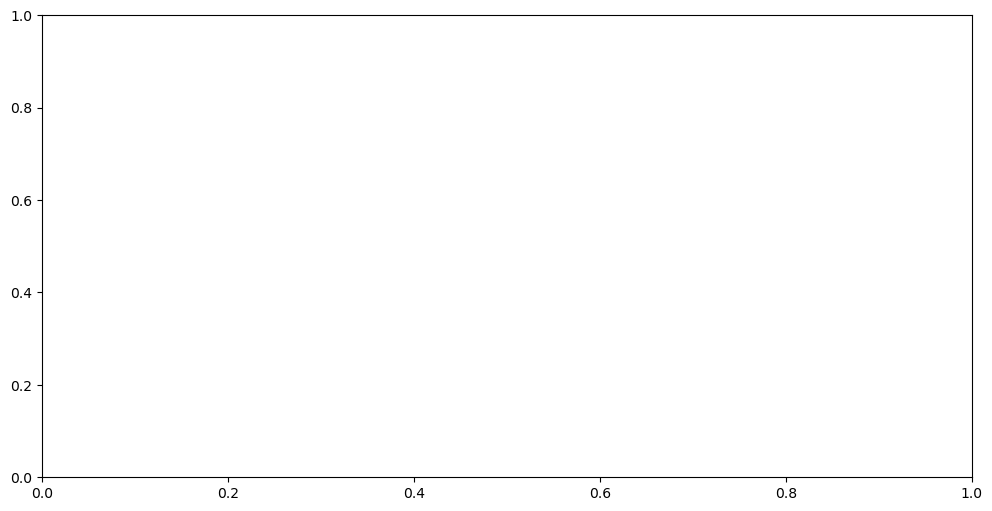

In [57]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

<AxesSubplot: xlabel='short_name', ylabel='points'>

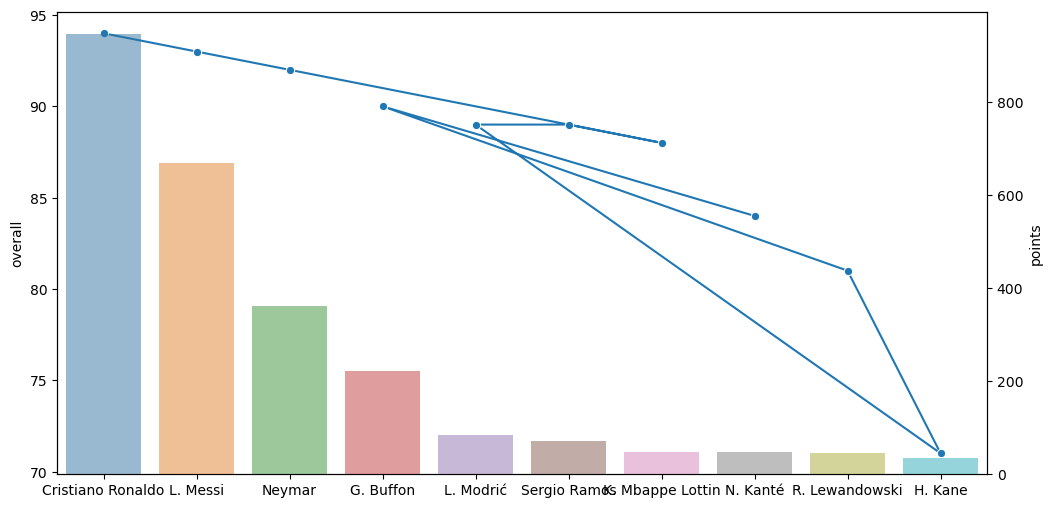

In [59]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = fifa17['overall'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = fifa17, x=fifa17['short_name'], y=fifa17['points'], alpha=0.5, ax=ax2)

In [24]:
x = fifa17.corr()['points']


/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_1665/4174595150.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [50]:
X = fifa17[['overall', 'height_cm']]
Y = fifa17['points']

In [51]:
X = sm.add_constant(X)

In [52]:
res = sm.OLS(Y, X).fit()

In [53]:
res.summary()

/Users/gerardrius/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.016
Date:                Sun, 05 Feb 2023   Prob (F-statistic):              0.204
Time:                        13:58:44   Log-Likelihood:                -68.971
No. Observations:                  10   AIC:                             143.9
Df Residuals:                       7   BIC:                             144.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1367.4907   2401.111     -0.570      0.587   -7045.215    4310.234
overall       27.6968     13.864      1.998      0.086      -5.085      60.479
height_cm     -4.4049     12.094     -0.364      0.726     -33.003      24.193
==============================================================================
Omnibus:                        2.754   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.302
Skew:                           0.878   Prob(JB):                        0.521
Kurtosis:                       2.801   Cond. No.                     5.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
fifa17

,player_id,fifa_version,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,...,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,points
0,20801,17,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,LW,94,87000000.0,575000.0,31,185,...,91.0,33.0,80.0,7,11,15,14,11,NaN,946
1,158023,17,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,89000000.0,575000.0,29,170,...,96.0,26.0,61.0,6,11,15,14,8,NaN,670
2,190871,17,Neymar,Neymar da Silva Santos Júnior,LW,92,109000000.0,450000.0,24,174,...,95.0,30.0,56.0,9,9,15,15,11,NaN,361
6,1179,17,G. Buffon,Gianluigi Buffon,GK,88,9000000.0,120000.0,38,192,...,NaN,NaN,NaN,87,88,68,90,84,46.0,221
5,177003,17,L. Modrić,Luka Modrić,CM,89,54000000.0,325000.0,30,174,...,89.0,72.0,66.0,13,9,7,14,9,NaN,84
4,155862,17,Sergio Ramos,Sergio Ramos García,CB,89,43500000.0,300000.0,30,183,...,71.0,87.0,83.0,11,8,9,7,11,NaN,71
9,231747,17,K. Mbappe Lottin,Kylian Mbappé Lottin,LW,71,3100000.0,20000.0,17,178,...,74.0,39.0,62.0,13,5,7,11,6,NaN,48
8,215914,17,N. Kanté,N'Golo Kanté,CM,81,21000000.0,130000.0,25,169,...,77.0,81.0,83.0,15,12,10,7,10,NaN,47
3,188545,17,R. Lewandowski,Robert Lewandowski,ST,90,71000000.0,250000.0,27,185,...,85.0,38.0,82.0,15,6,12,8,10,NaN,45
7,202126,17,H. Kane,Harry Kane,ST,84,41000000.0,140000.0,22,188,...,78.0,42.0,81.0,8,10,11,14,11,NaN,36


In [61]:
fifa17['player_positions'].value_counts()

LW    3
CM    2
ST    2
RW    1
GK    1
CB    1
Name: player_positions, dtype: int64

In [66]:
last_5_years = pd.concat([fifa17, fifa18, fifa19, fifa21, fifa22], ignore_index=True, sort=False)
last_5_years

,player_id,fifa_version,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,...,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,points
0,20801,17,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,LW,94,87000000.0,575000.0,31,185,...,91.0,33.0,80.0,7,11,15,14,11,NaN,946
1,158023,17,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,89000000.0,575000.0,29,170,...,96.0,26.0,61.0,6,11,15,14,8,NaN,670
2,190871,17,Neymar,Neymar da Silva Santos Júnior,LW,92,109000000.0,450000.0,24,174,...,95.0,30.0,56.0,9,9,15,15,11,NaN,361
3,1179,17,G. Buffon,Gianluigi Buffon,GK,88,9000000.0,120000.0,38,192,...,NaN,NaN,NaN,87,88,68,90,84,46.0,221
4,177003,17,L. Modrić,Luka Modrić,CM,89,54000000.0,325000.0,30,174,...,89.0,72.0,66.0,13,9,7,14,9,NaN,84
5,155862,17,Sergio Ramos,Sergio Ramos García,CB,89,43500000.0,300000.0,30,183,...,71.0,87.0,83.0,11,8,9,7,11,NaN,71
6,231747,17,K. Mbappe Lottin,Kylian Mbappé Lottin,LW,71,3100000.0,20000.0,17,178,...,74.0,39.0,62.0,13,5,7,11,6,NaN,48
7,215914,17,N. Kanté,N'Golo Kanté,CM,81,21000000.0,130000.0,25,169,...,77.0,81.0,83.0,15,12,10,7,10,NaN,47
8,188545,17,R. Lewandowski,Robert Lewandowski,ST,90,71000000.0,250000.0,27,185,...,85.0,38.0,82.0,15,6,12,8,10,NaN,45
9,202126,17,H. Kane,Harry Kane,ST,84,41000000.0,140000.0,22,188,...,78.0,42.0,81.0,8,10,11,14,11,NaN,36


In [69]:
player_positions = last_5_years['player_positions'].value_counts()

In [70]:
fig = px.histogram(last_5_years, x=last_5_years['player_positions'])
fig.show()

In [73]:
fig = px.histogram(last_5_years, x=last_5_years['long_name'])
fig.show()


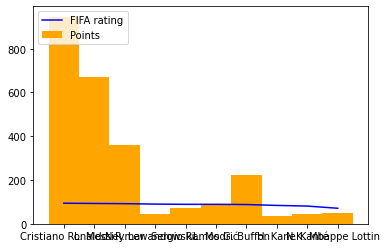

In [6]:
xlabel = fifa17['short_name']
points  = fifa17['points']
rating = fifa17['overall']

plt.plot(xlabel, rating, "-b", label="FIFA rating")
plt.bar(xlabel, points, width=1, alpha=1, color='orange', label="Points",)
plt.legend(loc="upper left")
plt.show()

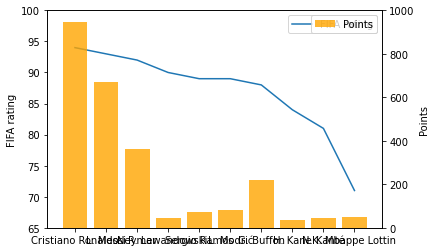

<Figure size 1008x504 with 0 Axes>

In [13]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(xlabel, rating) 
ax1.set_ylabel('FIFA rating')
ax1.set_ylim(65, 100)
ax1.legend(['FIFA rating'], loc="upper right")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.bar(xlabel, points, width=0.8, alpha=0.8, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Points')
ax2.set_ylim(0, 1000)
ax2.legend(['Points'], loc="upper right")

plt.figure(figsize=(14,7)) 
plt.show()
